## Sentiment Analysis of News Organization's Tweets
*  At the time of this analyis CNN and Fox had the most overall positive tweets on average. 
* When run multiple times at different times during the day, Fox News consitently had more positively rated tweets, which may make sense since they are in support of the current administration versus other news organizations. 
* Overall BBC World has had some of the more negatively scored tweets by far according to the Vader Analysis. This may be due to the wider range of geographic areas covered in their news coverage.  


In [2]:
#Import dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import time
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [3]:
#Import Vader Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
#Import keys for using tweepy
from configtwit import consumer_key, consumer_secret, access_token, access_secret

In [5]:
#Define authorization and access tokens and set twitter API wrapper with authorization and parser object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, parser= tweepy.parsers.JSONParser())

In [6]:
#Do a simple call and analysis on one tweet to see how results look and how they can be used. 
user_tweets = api.user_timeline("@BBCWorld")
print(analyzer.polarity_scores(user_tweets[19]["text"]))
      
#results = analyzer.polarity_scores(user_tweets[i]["text"])


{'neg': 0.216, 'neu': 0.784, 'pos': 0.0, 'compound': -0.296}


In [7]:
#Put together list of news organizations for tweets to analyze
targetusers = ["@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes"]

sentiments = []


oldest_tweet = None

counter = 0

#Loop through all target users and for each user loop through 5 pages (each page has 20 tweets). For each user and 
#page, loop through each of the 20 tweets per page per user and do a vader analysis on each tweet's text. 

#max_id – Returns only statuses with an ID less than (that is, older than) or equal to the specified ID
for user in targetusers:
    #Set a variable to hold the initial max_id variable. 
    oldest_tweet = None
    # For each user we have to reset the counter on the number of tweets cycled through. The counter is used for the "Tweets Ago" x variable. 

    counter = 0
    
    #loop through 5 pages of tweets (100 tweets in total for each target user)   
    for x in range(5):
        user_tweets = api.user_timeline(user, max_id = oldest_tweet, page = x)
        #print(user_tweets)
        
        
        for i in range(20):
            
            # Run a vader analysis on each of the 20 tweets for each of the 5 pages for each user. 
            results = analyzer.polarity_scores(user_tweets[i]["text"])
            
        
            compound = results["compound"]
            pos = results["pos"]
            neg = results['neg']
            neu = results["neu"]
            
            #After each tweet analyzed, decrease the max_id variable (which delineates the last tweet analyzed for each user)
            #by one to include the last tweet analyzed as the starting point for the next loop of 20 tweets so that all tweets
            #analyzed are consecutive. 
            oldest_tweet = (user_tweets[i]["id"])-1
            
            #Append all the variables to a list of keys that can be transformed into a data frame in the next step. 
            sentiments.append({"News Organization": user,
                               "Date": user_tweets[i]["created_at"],
                              "Compound Score": compound,
                              "Positive Score": pos,
                              "Negative Score": neg,
                              "Neutral Score": neu,
                             "Tweets Ago": counter})
            
           
            # For each tweet analyzed increase the counter (Tweets Ago) by one to signify how 
            #many tweets in the past a particular tweet exists in relation to another.
            counter += 1
            
            
            
print(sentiments[0])


{'News Organization': '@BBCWorld', 'Date': 'Thu Aug 02 00:00:24 +0000 2018', 'Compound Score': -0.5994, 'Positive Score': 0.0, 'Negative Score': 0.302, 'Neutral Score': 0.698, 'Tweets Ago': 0}


In [15]:
#Set the dictionary of sentiments to a dataframe. 
news_sentiments_df = pd.DataFrame(sentiments)

news_sentiments_df.to_csv("Output/NewsTweetsSentiments.csv")
news_sentiments_df.head()

,Compound Score,Date,Negative Score,Neutral Score,News Organization,Positive Score,Tweets Ago
0,-0.5994,Thu Aug 02 00:00:24 +0000 2018,0.302,0.698,@BBCWorld,0.000,0
1,0.0000,Wed Aug 01 23:45:14 +0000 2018,0.000,1.000,@BBCWorld,0.000,1
2,0.0000,Wed Aug 01 23:11:21 +0000 2018,0.000,1.000,@BBCWorld,0.000,2
3,-0.7906,Wed Aug 01 23:08:37 +0000 2018,0.438,0.562,@BBCWorld,0.000,3
4,0.3400,Wed Aug 01 22:40:25 +0000 2018,0.144,0.625,@BBCWorld,0.231,4


In [9]:
print(targetusers)

['@BBCWorld', '@CBSNews', '@CNN', '@FoxNews', '@nytimes']


In [10]:
#Make separate data frames for each news organization so that each one can be plotted separately. 
BBC_df = news_sentiments_df[news_sentiments_df["News Organization"]== "@BBCWorld"]
Fox_df = news_sentiments_df[news_sentiments_df["News Organization"]== "@FoxNews"]
CBS_df = news_sentiments_df[news_sentiments_df["News Organization"]== "@CBSNews"]
CNN_df = news_sentiments_df[news_sentiments_df["News Organization"]== "@CNN"]
NYT_df = news_sentiments_df[news_sentiments_df["News Organization"]== "@nytimes"]

#BBC_df = BBC_df.set_index("News Organization")

# print(len(news_sentiments_df))
# print(len(BBC_df))
CNN_df.head()

,Compound Score,Date,Negative Score,Neutral Score,News Organization,Positive Score,Tweets Ago
200,-0.4588,Thu Aug 02 00:41:52 +0000 2018,0.125,0.875,@CNN,0.000,0
201,0.4767,Thu Aug 02 00:41:07 +0000 2018,0.000,0.846,@CNN,0.154,1
202,0.0000,Thu Aug 02 00:40:42 +0000 2018,0.000,1.000,@CNN,0.000,2
203,-0.1779,Thu Aug 02 00:35:00 +0000 2018,0.099,0.830,@CNN,0.071,3
204,0.0000,Thu Aug 02 00:34:54 +0000 2018,0.000,1.000,@CNN,0.000,4


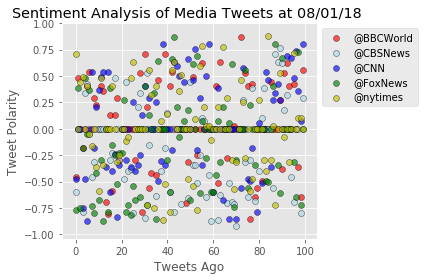

In [21]:
CNNplot = plt.scatter(CNN_df["Tweets Ago"], CNN_df["Compound Score"], c = "r", marker = "o", alpha = 0.65, edgecolor = "black")
BBCplot = plt.scatter(BBC_df["Tweets Ago"], BBC_df["Compound Score"], c = "lightblue", marker = "o", alpha = 0.65, edgecolor = "black")
Foxplot = plt.scatter(Fox_df["Tweets Ago"], Fox_df["Compound Score"], c = "b", marker = "o", alpha = 0.65, edgecolor = "black")
CBSplot= plt.scatter(CBS_df["Tweets Ago"], CBS_df["Compound Score"], c = "g", marker = "o", alpha = 0.65, edgecolor = "black")
NYTplot= plt.scatter(NYT_df["Tweets Ago"], NYT_df["Compound Score"], c = "y", marker = "o", alpha = 0.65, edgecolor = "black")

plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets at %s " %time.strftime("%x"))
plt.legend(targetusers, bbox_to_anchor = (1,1))
plt.tight_layout()
plt.savefig("Output/NewsSentimentsScatter.png")
# plt.savefig("Output/NewsSentimentsScatterCBS.png")
plt.grid(True)
plt.show()

In [12]:
print(targetusers)

['@BBCWorld', '@CBSNews', '@CNN', '@FoxNews', '@nytimes']


In [13]:
#Get the averages for each compound score for each news organization. 
averagesgroup = news_sentiments_df.groupby("News Organization").mean()["Compound Score"]

averagesgroup.head()



News Organization
@BBCWorld   -0.151666
@CBSNews    -0.124350
@CNN         0.029404
@FoxNews     0.021877
@nytimes     0.015008
Name: Compound Score, dtype: float64

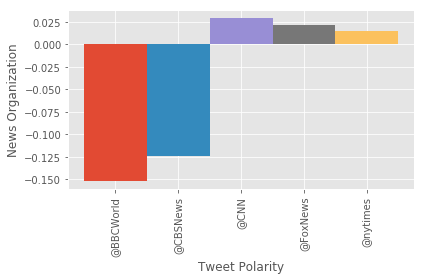

In [14]:
#Plot out the averages for each news organization. 
averagesgroup.plot(kind = "bar", width = 1, align = "center")
plt.xlabel("Tweet Polarity")
plt.ylabel("News Organization")
plt.savefig("Output/CompoundScoreAverageNews.png")
plt.tight_layout()
plt.show()